In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Reading the csv file

In [56]:
df1 = pd.read_csv('values.csv') 
df1.head(5)



,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [57]:
df2 = pd.read_csv('labels.csv')
df2.head(5)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [58]:
df1.shape

(180, 14)

In [59]:
df2.shape

(180, 2)

In [60]:
df1.patient_id == df2.patient_id

0      True
1      True
2      True
3      True
4      True
       ... 
175    True
176    True
177    True
178    True
179    True
Name: patient_id, Length: 180, dtype: bool

##### datasets in df1 and df2 are having a common column name (patient_id) .
##### although df1 consists of 14 column but not column withdefining heart_disease_present(target variable).
#####  while df2 consists heart_disease_present(target variable) . hence merging df1 and df2.



 # MERGING DATAFRAMES

In [61]:
df3 = pd.merge(df1,df2,on='patient_id')
df3.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Exploratory Data Analysis
## Exploring the data set in order to derive useful information

In [62]:
df3.shape

(180, 15)

#####  this shows dataset consists of 180 rows and 15 columns

In [63]:
df3.columns 

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

##### we can see the column names here


##### Patient ID is an redundant information while predicting heart diseases cases so we can drop it

In [64]:
df4= df3.drop(['patient_id'], axis=1)
df4.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [75]:
df4.shape

(180, 14)

In [76]:
df4.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

##### we notice that the dataset has no null valuesi.e no missing data. this saved us from conveting the null values into some data or dropping then altogether.

In [77]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int32  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

##### we observed that thal   Dtype is non-numeric . hence converting it into numeric value

In [78]:
df4.thal.unique()

array([1, 2, 0])

In [79]:
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder()

In [80]:
df4.thal = le.fit_transform(df.thal)
df4.thal

0      1
1      1
2      1
3      2
4      2
      ..
175    2
176    1
177    2
178    1
179    1
Name: thal, Length: 180, dtype: int32

In [81]:
df4.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [82]:
df4.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.568247,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


###### Describe provides us with statistical information in the numerical format. we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs mean of age is 54yrs. The quartiles details are given in form of 25%, 50% and 75%.  standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.

##### Finding the correlation among the attributes

<AxesSubplot:>

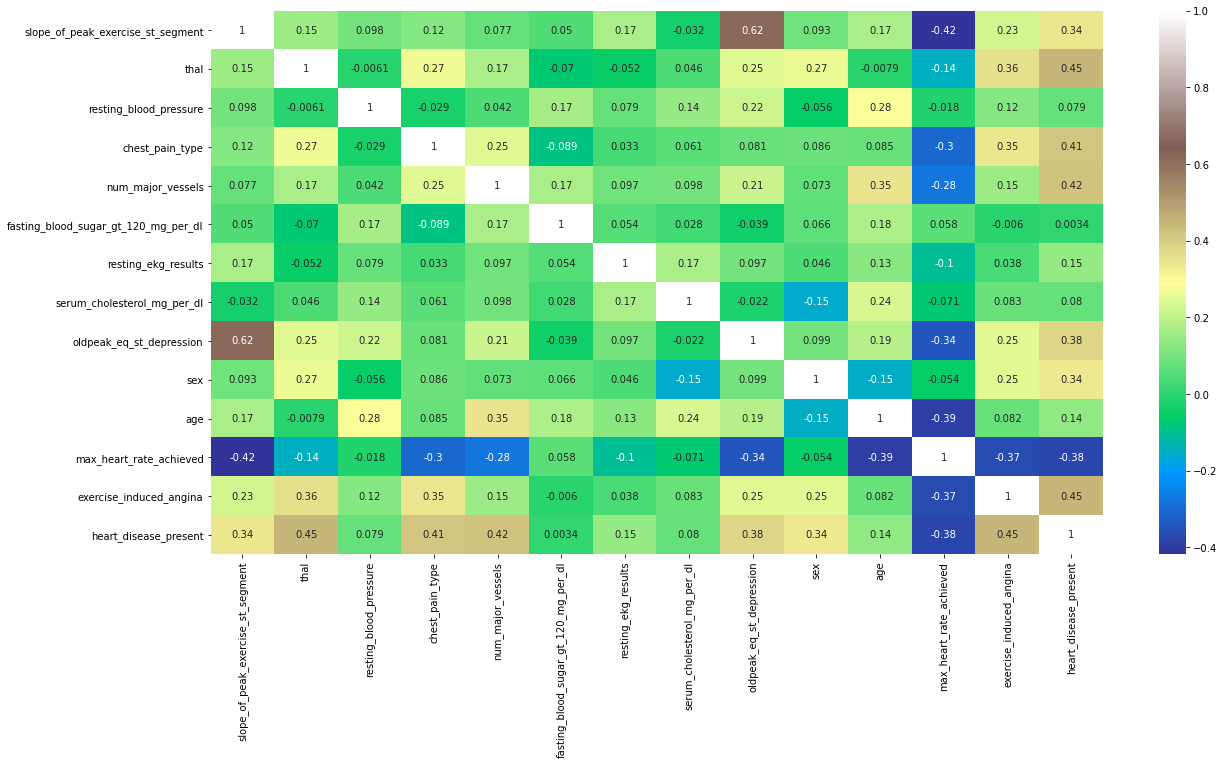

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(), annot=True, cmap='terrain') 

In [84]:
df4.corr().heart_disease_present.sort_values() 

max_heart_rate_achieved                -0.375352
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_blood_pressure                  0.078506
serum_cholesterol_mg_per_dl             0.079775
age                                     0.138255
resting_ekg_results                     0.145933
sex                                     0.335421
slope_of_peak_exercise_st_segment       0.344224
oldpeak_eq_st_depression                0.382930
chest_pain_type                         0.412829
num_major_vessels                       0.421519
thal                                    0.447214
exercise_induced_angina                 0.448647
heart_disease_present                   1.000000
Name: heart_disease_present, dtype: float64

####   oldpeak_eq_st_depression   is highly correlated to slope_of_peak_exercise_st_segment hence droping them


In [85]:
df= df4.drop(['slope_of_peak_exercise_st_segment'], axis=1)
df.head()

,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [86]:
df.head()

,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [87]:
df.shape

(180, 13)

In [88]:
df.corr().heart_disease_present.sort_values() 

max_heart_rate_achieved                -0.375352
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_blood_pressure                  0.078506
serum_cholesterol_mg_per_dl             0.079775
age                                     0.138255
resting_ekg_results                     0.145933
sex                                     0.335421
oldpeak_eq_st_depression                0.382930
chest_pain_type                         0.412829
num_major_vessels                       0.421519
thal                                    0.447214
exercise_induced_angina                 0.448647
heart_disease_present                   1.000000
Name: heart_disease_present, dtype: float64

In [89]:
# sns.pairplot(data=df)

array([[<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>],
       [<AxesSubplot:title={'center':'num_major_vessels'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar_gt_120_mg_per_dl'}>,
        <AxesSubplot:title={'center':'resting_ekg_results'}>],
       [<AxesSubplot:title={'center':'serum_cholesterol_mg_per_dl'}>,
        <AxesSubplot:title={'center':'oldpeak_eq_st_depression'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'max_heart_rate_achieved'}>,
        <AxesSubplot:title={'center':'exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'heart_disease_present'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

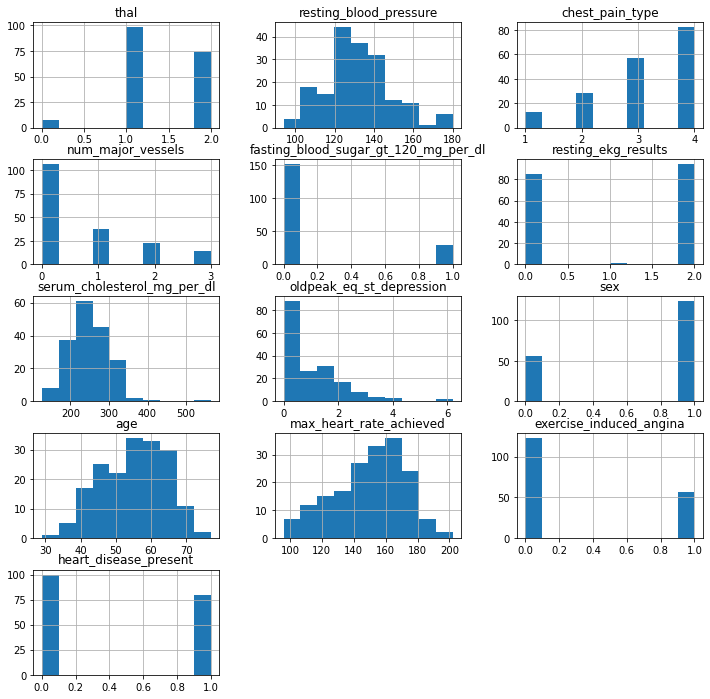

In [90]:
df.hist(figsize=(12,12), layout=(5,3))

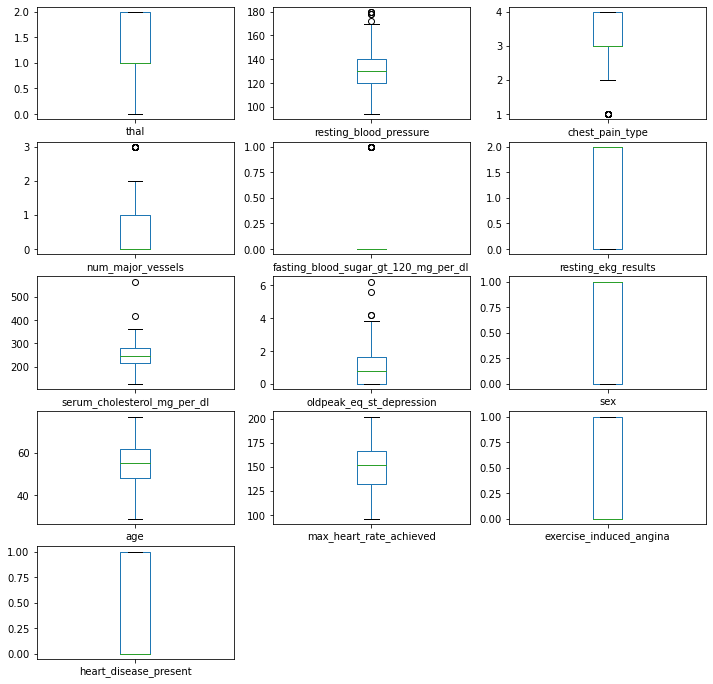

In [91]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

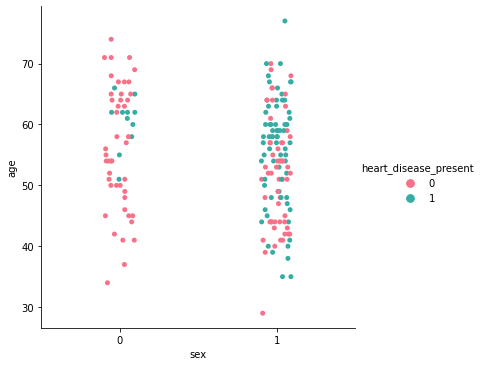

In [92]:
sns.catplot(data=df, x='sex', y='age',  hue='heart_disease_present', palette='husl')

<AxesSubplot:xlabel='sex', ylabel='serum_cholesterol_mg_per_dl'>

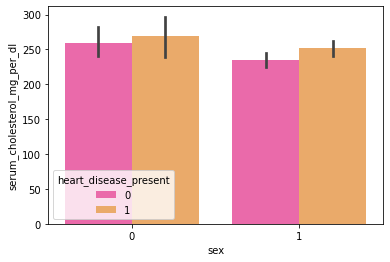

In [93]:
sns.barplot(data=df, x='sex', y='serum_cholesterol_mg_per_dl', hue='heart_disease_present', palette='spring')

In [94]:
df['sex'].value_counts()

1    124
0     56
Name: sex, dtype: int64

##### 124 Males 56 Females

In [95]:
df['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

###### 80 persons suffers from heart disease while 100 persons have no heart disease 

In [96]:
df['thal'].value_counts()

1    98
2    74
0     8
Name: thal, dtype: int64

#### results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect 

<AxesSubplot:xlabel='sex', ylabel='count'>

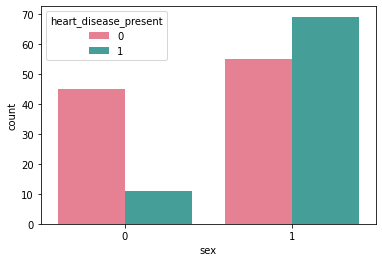

In [97]:
sns.countplot(x='sex', data=df, palette='husl', hue='heart_disease_present')

##### here 0 represents Female and 1 represents males.  In the given data set males as compared to females suffers more from heart disease 

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

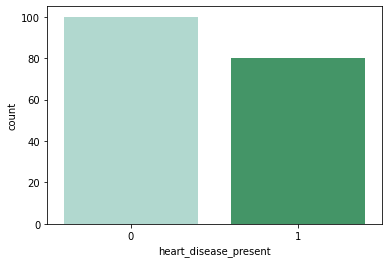

In [98]:
sns.countplot(x='heart_disease_present',palette='BuGn', data=df)

##### we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 100 and those having heart disease the count is 80

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

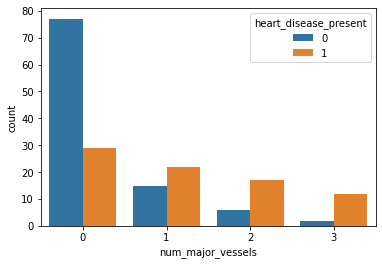

In [99]:
sns.countplot(x='num_major_vessels',hue='heart_disease_present',data=df)

In [100]:
df['num_major_vessels'].value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

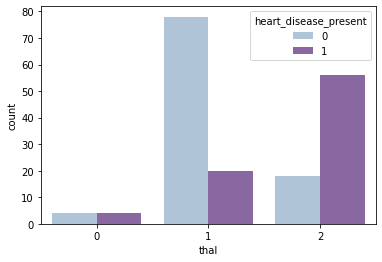

In [101]:
sns.countplot(x='thal',data=df, hue='heart_disease_present', palette='BuPu' )

<AxesSubplot:xlabel='thal', ylabel='count'>

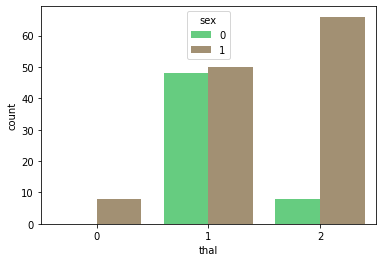

In [102]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')


In [103]:
df['chest_pain_type'].value_counts()  # chest pain type


4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

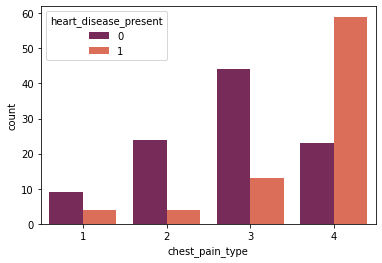

In [104]:
sns.countplot(x='chest_pain_type' ,hue='heart_disease_present', data=df, palette='rocket')


##### shows chest pain with respect to heart disease

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

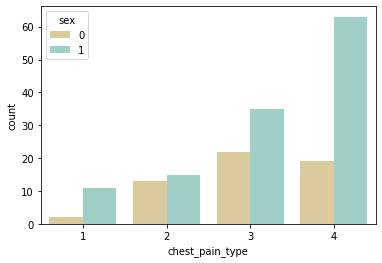

In [105]:
sns.countplot(x='chest_pain_type', hue='sex',data=df, palette='BrBG')

#####  this shows chest pain count experienced by male and female

<AxesSubplot:xlabel='sex', ylabel='chest_pain_type'>

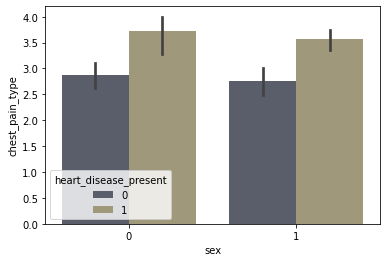

In [106]:
sns.barplot(x='sex', y='chest_pain_type', hue='heart_disease_present',data=df, palette='cividis')

<AxesSubplot:xlabel='sex', ylabel='thal'>

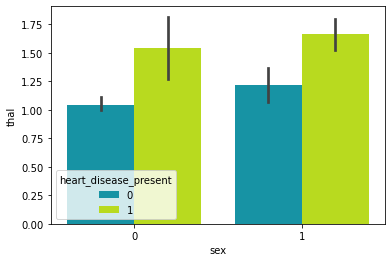

In [107]:
sns.barplot(x='sex', y='thal', data=df, hue='heart_disease_present', palette='nipy_spectral')


<AxesSubplot:xlabel='heart_disease_present', ylabel='num_major_vessels'>

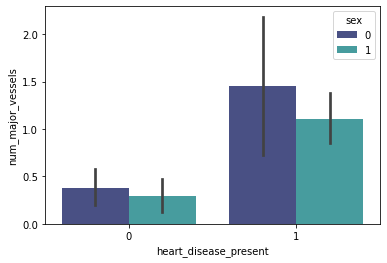

In [108]:
sns.barplot(x='heart_disease_present', y='num_major_vessels', hue='sex', data=df, palette='mako')


<AxesSubplot:xlabel='sex', ylabel='oldpeak_eq_st_depression'>

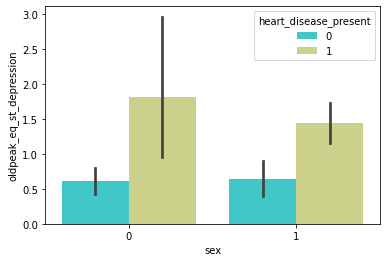

In [109]:
sns.barplot(x='sex', y='oldpeak_eq_st_depression', hue='heart_disease_present', palette='rainbow', data=df)


In [110]:
df['fasting_blood_sugar_gt_120_mg_per_dl'].value_counts()


0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='serum_cholesterol_mg_per_dl'>

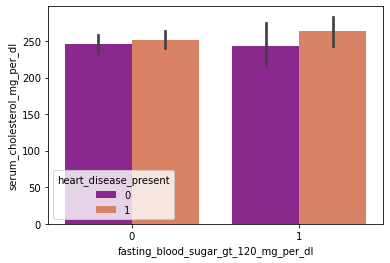

In [111]:
sns.barplot(x='fasting_blood_sugar_gt_120_mg_per_dl', y='serum_cholesterol_mg_per_dl', hue='heart_disease_present', data=df,palette='plasma' )


<AxesSubplot:xlabel='sex', ylabel='heart_disease_present'>

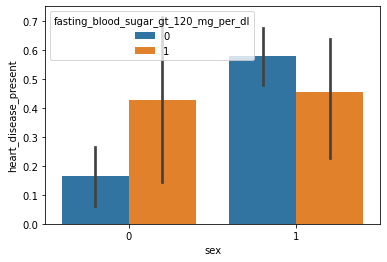

In [112]:
sns.barplot(x='sex',y='heart_disease_present', hue='fasting_blood_sugar_gt_120_mg_per_dl',data=df)


In [113]:
df.head()

,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,2,178,1,0,0,2,270,4.2,1,59,145,0,0


# Scaling the data

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [115]:
df.head()


,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,-0.195195,2,0,0,2,1.118269,0.0,1,-1.053964,0.932485,0,0
1,1,-1.256320,3,0,0,0,-0.669778,1.6,0,-0.087134,0.387084,0,0
2,1,-0.372049,4,3,0,2,1.042182,0.0,1,2.383654,0.568884,1,1
3,2,1.219639,4,0,0,0,-0.498582,0.0,1,-1.591092,1.432436,0,1
4,2,2.752375,1,0,0,2,0.395442,4.2,1,0.449994,-0.203768,0,0


## Target And Predictors

In [116]:
X = df.iloc[:,:-1]
y =  df.heart_disease_present


In [117]:
X.columns

Index(['thal', 'resting_blood_pressure', 'chest_pain_type',
       'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl',
       'resting_ekg_results', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved',
       'exercise_induced_angina'],
      dtype='object')

# train and test split

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

In [119]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 1728
X_test- 432
y_train- 144
y_test- 36


# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)

In [121]:
model1= lr.fit(X_train, y_train)

In [122]:
y_predict1 = lr.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict1)

0.9444444444444444

In [124]:
pd.crosstab(y_test, y_predict1)

col_0,0,1
heart_disease_present,,
0,18,2
1,0,16


In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.89      1.00      0.94        16

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



# Feature selection

In [126]:
Z = df.loc[ :,['sex','oldpeak_eq_st_depression','chest_pain_type','num_major_vessels','thal','exercise_induced_angina']]
    
y = df.heart_disease_present

In [127]:
from sklearn.model_selection import train_test_split

Z_train, Z_test, y_train, y_test = train_test_split(Z,y, test_size=0.2, random_state=25)

In [128]:
print('Z_train-', Z_train.size)
print('Z_test-',Z_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

Z_train- 864
Z_test- 216
y_train- 144
y_test- 36


# logistic Regression with feature selection

In [129]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter=2000)

model3= lr1.fit(Z_train, y_train)

y_predict3 = lr1.predict(Z_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict3)

0.9444444444444444

In [130]:
pd.crosstab(y_test, y_predict3)

col_0,0,1
heart_disease_present,,
0,18,2
1,0,16


In [131]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.89      1.00      0.94        16

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

